## Setup dan Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import load_iris, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

np.random.seed(42)
%matplotlib inline

## 1. Linear SVM Classification

SVM mencoba mencari hyperplane terbaik yang memisahkan kelas dengan margin terbesar.

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Ambil hanya 2 kelas untuk simplifikasi (binary classification)
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

print(f"Jumlah sampel: {len(X)}")
print(f"Kelas: {np.unique(y)}")

Jumlah sampel: 100
Kelas: [0 1]


In [3]:
# Train Linear SVM
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

print(f"Model accuracy: {svm_clf.score(X, y):.2f}")

Model accuracy: 1.00


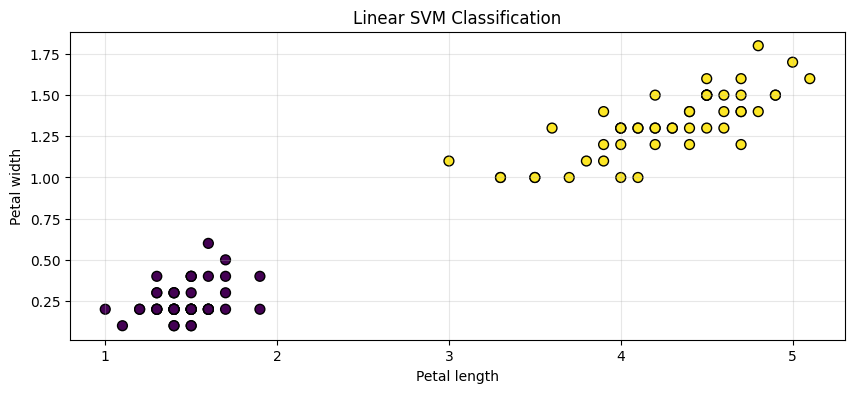

In [4]:
# Visualisasi hasil
plt.figure(figsize=(10, 4))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Linear SVM Classification')
plt.grid(True, alpha=0.3)
plt.show()

## 2. Pengaruh Parameter C

Parameter C mengontrol trade-off antara margin yang lebar dengan jumlah violation.
- C besar → margin sempit, fewer violations
- C kecil → margin lebar, more violations

In [5]:
# Bandingkan SVM dengan C berbeda
C_values = [0.1, 1, 10]

for C in C_values:
    model = SVC(kernel="linear", C=C)
    model.fit(X, y)
    print(f"C={C}: Accuracy = {model.score(X, y):.3f}, Support Vectors = {len(model.support_vectors_)}")

C=0.1: Accuracy = 1.000, Support Vectors = 12
C=1: Accuracy = 1.000, Support Vectors = 2
C=10: Accuracy = 1.000, Support Vectors = 2


## 3. Nonlinear SVM dengan Polynomial Kernel

Untuk data yang tidak linearly separable, kita bisa menggunakan polynomial kernel.

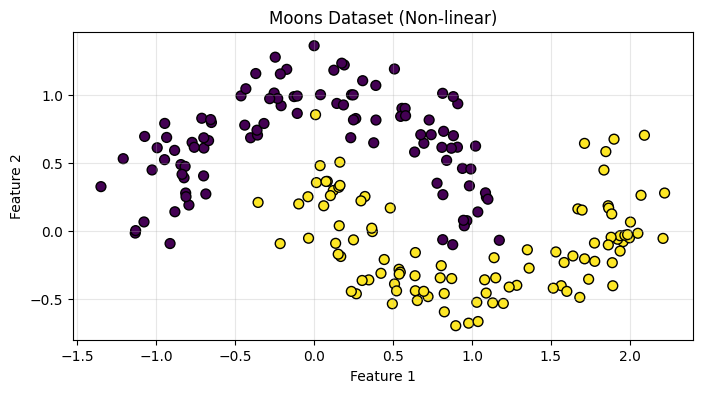

In [6]:
# Buat dataset yang lebih kompleks
X_moons, y_moons = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.figure(figsize=(8, 4))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis', s=50, edgecolors='k')
plt.title('Moons Dataset (Non-linear)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# Train dengan Polynomial Kernel
poly_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_svm.fit(X_moons, y_moons)
print(f"Polynomial SVM accuracy: {poly_svm.score(X_moons, y_moons):.3f}")

Polynomial SVM accuracy: 0.995


## 4. RBF (Radial Basis Function) Kernel

RBF kernel adalah pilihan populer untuk data non-linear. Parameter gamma mengontrol seberapa jauh pengaruh satu training sample.

In [8]:
# Train dengan RBF Kernel
rbf_svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.1))
])

rbf_svm.fit(X_moons, y_moons)
print(f"RBF SVM accuracy: {rbf_svm.score(X_moons, y_moons):.3f}")

RBF SVM accuracy: 0.995


## 5. Perbandingan Berbagai Kernel

In [9]:
# Bandingkan linear, poly, dan RBF kernel
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel=kernel, C=1))
    ])
    model.fit(X_moons, y_moons)
    accuracy = model.score(X_moons, y_moons)
    print(f"{kernel.upper()} Kernel: Accuracy = {accuracy:.3f}")

LINEAR Kernel: Accuracy = 0.845
POLY Kernel: Accuracy = 0.900
RBF Kernel: Accuracy = 0.980


## 6. SVM Regression

SVM juga bisa digunakan untuk regression tasks dengan SVR (Support Vector Regression).

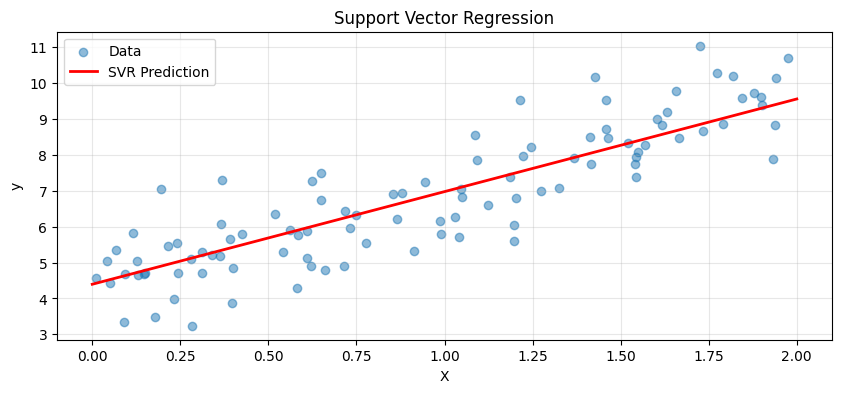

In [10]:
from sklearn.svm import SVR

# Generate data untuk regression
np.random.seed(42)
X_reg = 2 * np.random.rand(100, 1)
y_reg = 4 + 3 * X_reg[:, 0] + np.random.randn(100)

# Train SVR
svr_model = SVR(kernel="linear", C=1)
svr_model.fit(X_reg, y_reg)

# Predict
X_test = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = svr_model.predict(X_test)

# Visualisasi
plt.figure(figsize=(10, 4))
plt.scatter(X_reg, y_reg, alpha=0.5, label='Data')
plt.plot(X_test, y_pred, 'r-', linewidth=2, label='SVR Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Praktik dengan Train-Test Split

In [11]:
# Split data moons
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)

# Train model
final_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=3, C=1))
])

final_model.fit(X_train, y_train)

# Evaluate
train_accuracy = final_model.score(X_train, y_train)
test_accuracy = final_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy: {test_accuracy:.3f}")

Training Accuracy: 1.000
Test Accuracy: 0.975


## Kesimpulan

**SVM Key Points:**
- Linear SVM bagus untuk data yang linearly separable
- Parameter C mengontrol regularization (trade-off antara margin dan violations)
- Polynomial dan RBF kernel untuk data non-linear
- Parameter gamma di RBF kernel mengontrol complexity
- SVM juga bisa digunakan untuk regression (SVR)
- Scaling data sangat penting untuk SVM